# Libreria

In [ ]:
# !pip install tensorflow==2.15

In [ ]:
# Librerías esenciales
import numpy as np
import os
import sys
import glob
import random
import datetime
import time

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow y Keras (usa solo tensorflow.keras, NO importes keras separado)
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, ReLU,
    AveragePooling2D, GlobalAveragePooling2D, UpSampling2D, Lambda, Add, Concatenate
)
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras import layers # Import the layers module
import keras
# Machine Learning y métricas
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, label_binarize
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    classification_report, roc_curve, auc, cohen_kappa_score, hamming_loss,
    log_loss, zero_one_loss, matthews_corrcoef
)

# Procesamiento de imágenes
import cv2
from skimage.util.shape import view_as_blocks
from scipy import ndimage, misc, signal

# Yellowbrick (visualización de métricas)
from yellowbrick.classifier import ClassificationReport


/tmp/ipython-input-2-348850448.py:38: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import ndimage, misc, signal


In [ ]:
print(tf.__version__)

2.18.0


In [ ]:
print(sys.version)

3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Carga de datos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
#Cargar los datos planos desde el archivo CSV
# flat_data_path = "/content/drive/MyDrive/BrainLat/Brainlat_Prueba/data_xgb_Prueba.csv"
flat_data_path = "/content/drive/MyDrive/BrainLat/Brainlat_Prueba/brainlat_EEG_Clean_Prueba.csv"
flat_data = pd.read_csv(flat_data_path)  # Ajustar el delimitador según corresponda

In [ ]:
flat_data.columns
# Codificar las etiquetas y seleccionar las características
flat_data['diagnosis_x'] = LabelEncoder().fit_transform(flat_data['diagnosis_x'])
labels = flat_data['diagnosis_x'].to_numpy()
features = flat_data.drop(['id EEG', 'diagnosis_x'], axis=1)  # Excluir columnas irrelevantes

In [ ]:
len(features.columns)

21

In [ ]:
# Ruta base para las STFT
stft_folder = "/content/drive/MyDrive/BrainLat/Vectores/sfft"

# Inicializar listas para almacenar datos
eeg_data = []
labels_stft = []
flat_features = []

# Recorrer los registros para cargar STFT y emparejar con los datos planos
for index, row in flat_data.iterrows():
    participant_id = row['id EEG']
    label_folder = None

    # Determinar la subcarpeta basada en el diagnóstico
    if row['diagnosis_x'] == 0:  # Cambiar el mapeo según corresponda
        label_folder = "1_AD"
    elif row['diagnosis_x'] == 2:
        label_folder = "2_bvFTD"
    elif row['diagnosis_x'] == 1:
        label_folder = "5_HC"

    if label_folder:
        file_path = os.path.join(stft_folder, label_folder, f"{participant_id}.npy")
        print(file_path)
        if os.path.exists(file_path):
            #eeg_array = np.load(file_path)
            #eeg_data.append(eeg_array)
            labels_stft.append(row['diagnosis_x'])
            flat_features.append(features.loc[index].to_numpy())
        else:
            print(f"Archivo {file_path} no encontrado. Ignorando este participante.")

# Convertir las listas a numpy arrays
#eeg_data = np.array(eeg_data)  # STFT
flat_features = np.array(flat_features)  # Datos planos
labels_stft = np.array(labels_stft)  # Etiquetas

# # Combinar los datos planos y las STFT en una estructura conjunta
# combined_data = list(zip(flat_features, eeg_data, labels_stft))

# # Dividir en conjuntos de entrenamiento y prueba
# train_data, test_data = train_test_split(combined_data, test_size=0.2, random_state=45, stratify=labels_stft)

# # Separar datos en componentes individuales
# X_train_flat, X_train_img, y_train = zip(*train_data)
# X_test_flat, X_test_img, y_test = zip(*test_data)

# # Convertir de nuevo a numpy arrays
# X_train_flat = np.array(X_train_flat)
# X_train_img = np.array(X_train_img)
# y_train = np.array(y_train)

# X_test_flat = np.array(X_test_flat)
# X_test_img = np.array(X_test_img)
# y_test = np.array(y_test)

# scaler = StandardScaler().fit(X_train_flat)
# X_train_flat = scaler.transform(X_train_flat)
# X_test_flat = scaler.transform(X_test_flat)
# # from sklearn import decomposition
# # pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
# # pca.fit(X_train_flat)
# # X_train_flat = pca.transform(X_train_flat)
# # X_test_flat=pca.transform(X_test_flat)
# # Imprimir tamaños de los conjuntos
# print("Datos planos:")
# print(f"X_train_flat shape: {X_train_flat.shape}, y_train shape: {y_train.shape}")
# print(f"X_test_flat shape: {X_test_flat.shape}, y_test shape: {y_test.shape}")

# print("\nImágenes STFT:")
# print(f"X_train_img shape: {X_train_img.shape}")
# print(f"X_test_img shape: {X_test_img.shape}")

# # Preparar los datos para el modelo
# train_data = [X_train_flat, X_train_img]  # Datos planos y STFT para entrenamiento
# test_data = [X_test_flat, X_test_img]    # Datos planos y STFT para prueba/validación

/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30001.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30002.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30004.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30008.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30009.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30011.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30012.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30013.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30015.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30018.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30020.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30022.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30026.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30029.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30031.npy
/content/drive/MyDrive/Br

In [ ]:
flat_features.shape

(58, 21)

# Funciones e hiperFunciones

In [ ]:
def squeeze_excitation_layer(input_layer, out_dim, ratio, conv):
  squeeze = tf.keras.layers.GlobalAveragePooling2D()(input_layer)
  excitation = tf.keras.layers.Dense(units=out_dim / ratio, activation='relu')(squeeze)
  excitation = tf.keras.layers.Dense(out_dim,activation='sigmoid')(excitation)
  excitation = tf.reshape(excitation, [-1,1,1,out_dim])
  scale = tf.keras.layers.multiply([input_layer, excitation])
  if conv:
    shortcut = tf.keras.layers.Conv2D(out_dim,kernel_size=1,strides=1,
                                      padding='same',kernel_initializer='he_normal')(input_layer)
    shortcut = tf.keras.layers.BatchNormalization()(shortcut)
  else:
    shortcut = input_layer
  out = tf.keras.layers.add([shortcut, scale])
  return out

def sreLu (input):
  return ReLU(negative_slope=0.1, threshold=0)(input)

def sConv(input,parameters,size,nstrides):
  return Conv2D(parameters, (size,size), strides=(nstrides,nstrides),padding="same", kernel_initializer='glorot_normal', kernel_regularizer=tf.keras.regularizers.l2(0.0001),bias_regularizer=tf.keras.regularizers.l2(0.0001))(input)

def sBN (input):
  return tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=True, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(input)

def sGlobal_Avg_Pooling (input):
  return tf.keras.layers.GlobalAveragePooling2D()(input)

def sDense (input, n_units, activate_c):
  return tf.keras.layers.Dense(n_units,activation=activate_c)(input)

def smultiply (input_1, input_2):
  return tf.keras.layers.multiply([input_1, input_2])

def sadd (input_1, input_2):
  return tf.keras.layers.add([input_1, input_2])


initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
) #A la medida


# Bloques TF


In [ ]:

from tensorflow.python.ops.gen_array_ops import shape

def Block_3 (input, parameter): # A
  addition = sConv(input, parameter, 1, 2)
  addition = sBN(addition)
  output = sConv(input, parameter, 3, 2)
  output = sBN(output)
  output = sreLu(output)
  output = sConv(output, parameter, 3, 1)
  output = sBN(output)
  multiplier = SE_Block(output,  parameter, parameter)
  output = smultiply(multiplier, output)
  output = sadd(output, addition)
  return output

def Block_1 (input, parameter): #B
  output = sConv(input, parameter, 3, 1)
  output = sBN(output)
  output = sreLu(output)
  return output


def Block_2 (input, parameter): #C
  output = Block_1(input, parameter)
  output = sConv(output, parameter, 3, 1)
  output = sBN(output)
  multiplier = SE_Block(output,  parameter, parameter)
  # output = smultiply(output, output)
  output = smultiply(multiplier, output)
  output = sadd(output, input)
  return output

def SE_Block(input, out_dim, ratio):
  output = sGlobal_Avg_Pooling(input)
  output = sDense(output, out_dim/ratio, 'relu')
  output = sDense(output, out_dim, 'sigmoid')
  return output



def Block_4 (input, parameter):
  output = Block_1(input, parameter)
  output = sConv(input, parameter, 3, 1)
  output = sBN(output)
  return output

# Hiperparametros TF

In [ ]:
NUM_LAYERS = 16
#------------Projected_Patches-----------------
IMAGE_SIZE_2 =  13# We will resize input images to this size.
PATCH_SIZE_2 = 11  # Size of the patches to be extracted from the input images.
NUM_PATCHES_2 = (IMAGE_SIZE_2 // PATCH_SIZE_2) ** 2
print(NUM_PATCHES_2)
#------------Attention_Data----------------------
LAYER_NORM_EPS_1 = 1e-6
PROJECTION_DIM_1 = 128 # No se puede modificar
NUM_HEADS_1 = 16
MLP_UNITS_1 = [
    PROJECTION_DIM_1 * 2,
    PROJECTION_DIM_1
]
#------------Attention_Images------------------
LAYER_NORM_EPS_2 = 1e-6
PROJECTION_DIM_2 = 128
NUM_HEADS_2 = 16
MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,
    PROJECTION_DIM_2
]
#---------Cross_Attention
NUM_HEADS_3 = 16
PROJECTION_DIM_3 = 128

1


# TF

In [ ]:
def position_embedding(projected_patches, num_patches=NUM_PATCHES_2, projection_dim=PROJECTION_DIM_2):
    # Build the positions.
    positions = tf.range(start=0, limit=num_patches, delta=1)
    # Encode the positions with an Embedding layer.
    encoded_positions = layers.Embedding(
        input_dim=num_patches, output_dim=projection_dim
    )(positions)
    # Add encoded positions to the projected patches.
    return projected_patches + encoded_positions

def mlp(x, dropout_rate, hidden_units):
    # Iterate over the hidden units and
    # add Dense => Dropout.
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

@tf.keras.utils.register_keras_serializable()
class CrossAttention(tf.keras.layers.Layer):
  def __init__(self,**kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    self.add = tf.keras.layers.Add()
    self.layernorm = tf.keras.layers.LayerNormalization()

  def call(self, x, y, **kwargs):
    attn, attention_scores = self.mha(
             query=x, value=y,
             return_attention_scores=True)

    self.last_attention_scores = attention_scores

    x = self.add([x, attn])
    return self.layernorm(x)

In [ ]:
def Attention_Data(encoded_patches):
    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_1)(encoded_patches)
    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_1, key_dim=PROJECTION_DIM_1, dropout=0.1
    )(x1, x1)
    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_1)(x2)
    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_1, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches_1 = layers.Add()([x4, x2])
    return encoded_patches_1

def Attention_Images(encoded_patches):
    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)
    # Multi Head Self Attention layer 1.
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1) #Dos atenciones, de datos planos y de imagenes
    #Seguida el cross atencion
    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])
    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)
    # MLP layer 1.
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches #Despues de esto ahi si se manda al cross atention de cada una, un encoded patches de datos y un encoded patches de imagenes

def Transformer(inputs,layer): #layers,Dropout_1---imagen,datos
    # atencion al canal
    input = squeeze_excitation_layer(inputs, out_dim=512, ratio=32.0, conv=False)
    print(input.shape)
    projected_patches = layers.Conv2D(
          filters=PROJECTION_DIM_2,
          kernel_size=(PATCH_SIZE_2, PATCH_SIZE_2),
          strides=(PATCH_SIZE_2, PATCH_SIZE_2),
          padding="VALID",
      )(input)
    _, h, w, c = projected_patches.shape
    projected_patches = layers.Reshape((h * w, c))(
          projected_patches
      )  # (B, number_patches, projection_dim)
      # Add positional embeddings to the projected patches.
    encoded_patches = position_embedding(
          projected_patches
      )
    print(f'layer: {layer.shape}')
    print(f'encoded_patches: {encoded_patches.shape}')

    encoded_patches_2 = layers.Dropout(0.1)(encoded_patches)
    # Iterate over the number of layers and stack up blocks of
    # Transformer.
    encoded_patches_1 = layer
    # Atención cruzada
    cross_attention_layer = CrossAttention(num_heads=NUM_HEADS_3, key_dim=PROJECTION_DIM_3)
    for i in range(NUM_LAYERS):
          # Add a Attention block.
        encoded_patches_1 = Attention_Data(encoded_patches_1)
        encoded_patches_2 = Attention_Images(encoded_patches_2)
        attn_1_to_2 = cross_attention_layer(encoded_patches_1, encoded_patches_2) #Query--Datos, Key--Imagenes
        attn_2_to_1 = cross_attention_layer(encoded_patches_2, encoded_patches_1) #Query--Imagenes, Key--Datos
    print(f'attn_1_to_2: {attn_1_to_2.shape}')
    print(f'attn_2_to_1: {attn_2_to_1.shape}')
    # Concatenar las salidas
    return tf.concat([attn_1_to_2, attn_2_to_1], axis=1) #2,128--1,256

# Modelo


In [ ]:
def new_arch():
  tf.keras.backend.clear_session()
#---------------------------------------------------Conv-Datos------------------------------------------------------------------------#
  # inputs_1 = Input(shape=(flat_features.shape[1],1), name="input_B")
  inputs_1 = Input(shape=(20,1), name="input_B")
  # Bloque 1
  Layer_1 = tf.keras.layers.Conv1D(8, 3, activation="selu", padding="same")(inputs_1)
  # Bloque 2
  Layer_1 = tf.keras.layers.Conv1D(16, 3, activation="selu", padding="same")(Layer_1)
  Pool_1 = tf.keras.layers.MaxPool1D(2)(Layer_1)
  # Bloque 3
  Layer_1 = tf.keras.layers.Conv1D(32, 3, activation="selu", padding="same")(Pool_1)
  Dropout_1 = tf.keras.layers.Dropout(rate=0.5)(Layer_1)
  # Bloque 4
  Layer_1 = tf.keras.layers.Conv1D(64, 3, activation="selu", padding="same")(Dropout_1)
  Dropout_1 = tf.keras.layers.Dropout(rate=0.5)(Layer_1)
  # Bloque 5
  Layer_1 = tf.keras.layers.Conv1D(128, 3, activation="selu", padding="same")(Dropout_1)
  Dropout_1 = tf.keras.layers.Dropout(rate=0.5)(Layer_1)
  #Dropout_1 va a la atencion
  print(f'Ultima capa input b{Dropout_1.shape}') #(None, 1, 256)
#---------------------------------------------------Conv-Wavelets------------------------------------------------------------------------#
  inputs_2 = tf.keras.Input(shape=(224, 224, 128), name="input_A")
  # L1
  layers = Block_3(inputs_2,64)#A
  #residual
  # L2
  layers = Block_1(layers,64) #B
  #residual
  # L3
  layers = Block_2(layers,64) #C
  #residual
  # L4 - L6
  for i in [ 64, 128, 256]:
    layers = Block_3(layers,i) #A
  #residual
  # L7
  layers = Block_4(layers,512)
  #Layers va a la atencion
  print(f'Ultima capa input a{layers.shape}')#(None, 14, 14, 512)
  #---------------------------------------------------Transformer------------------------------------------------------------------------#
  ViT=Transformer(layers,Dropout_1)
  print(ViT.shape)
  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_1)(ViT)
  representation = tf.keras.layers.GlobalAvgPool1D()(representation)
  #---------------------------------------------------------CapsNet------------------------------------------------------------------------------
  # squashed_output = tf.keras.layers.Lambda(squash)(representation)
  # digit_caps = DigitCapsuleLayer()(squashed_output)
  # Acont = safe_norm(digit_caps)
  # mast = tf.reshape(Acont, (-1, Acont.shape[2], Acont.shape[3]))
  # cnoutputs = tf.keras.layers.Lambda(output_layer)(mast)
  # model =tf.keras.Model(inputs = [inputs_1,inputs_2] ,outputs=cnoutputs)
  #---------------------------------------------------Fully Connected---------------------------------------------------------------------------
  layers = Dense(128,activation="gelu",kernel_initializer='glorot_normal',kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                 bias_regularizer=tf.keras.regularizers.l2(0.0001))(representation)
  layers = ReLU(negative_slope=0.1, threshold=0)(layers)
  layers = BatchNormalization()(layers)

  layers = Dense(64,activation="gelu",kernel_initializer='glorot_normal',kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                 bias_regularizer=tf.keras.regularizers.l2(0.0001))(layers)
  layers = ReLU(negative_slope=0.1, threshold=0)(layers)
  layers = BatchNormalization()(layers)

  layers = Dense(32,activation="gelu",kernel_initializer='glorot_normal',kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                 bias_regularizer=tf.keras.regularizers.l2(0.0001))(layers)
  layers = ReLU(negative_slope=0.1, threshold=0)(layers)
  layers = BatchNormalization()(layers)

  #Softmax
  predictions = Dense(3, activation="softmax", name="output_12")(layers)
  model =tf.keras.Model(inputs = [inputs_1,inputs_2] ,outputs=predictions)
  if compile:
      model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001),
      #model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
      print ("Transformer_create")
  return model

In [ ]:
model = new_arch()

Ultima capa input b(None, 10, 128)
Ultima capa input a(None, 14, 14, 512)
(None, 14, 14, 512)
layer: (None, 10, 128)
encoded_patches: (None, 1, 128)
attn_1_to_2: (None, 10, 128)
attn_2_to_1: (None, 1, 128)
(None, 11, 128)
Transformer_create


In [ ]:
path_log_base = '/content/logs'
path_img_base = '/content/images'

if not os.path.exists(path_log_base):
    os.makedirs(path_log_base)
if not os.path.exists(path_img_base):
    os.makedirs(path_img_base)


def train(model, X_train1, X_train, y_train, X_valid1,X_valid, y_valid, X_test1,X_test, y_test, batch_size, epochs, model_name=""):
    start_time = tm.time()
    # log_dir=path_log_base+"/"+model_name+"_"+str(datetime.datetime.now().isoformat()[:19].replace("T", "_").replace(":","-"))
    log_dir=path_log_base+"/"+model_name
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)
    filepath = log_dir+"/saved-model-{epoch:03d}-{val_accuracy:.4f}.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max')
    model.reset_states()

    global lossTEST
    global accuracyTEST
    global lossTRAIN
    global accuracyTRAIN
    global lossVALID
    global accuracyVALID
    lossTEST,accuracyTEST   = model.evaluate([X_test1,X_test], y_test,verbose=None)
    lossTRAIN,accuracyTRAIN = model.evaluate([X_train1,X_train], y_train,verbose=None)
    lossVALID,accuracyVALID = model.evaluate([X_valid1,X_valid], y_valid,verbose=None)

    global history
    global model_Name
    global log_Dir
    model_Name = model_name
    log_Dir = log_dir
    print("Starting the training...")
    history=model.fit([X_train1,X_train], y_train, epochs=epochs,
                      callbacks=[tensorboard,checkpoint],
                      batch_size=batch_size,validation_data=([X_valid1,X_valid], y_valid),verbose=2)

    metrics = model.evaluate([X_test1, X_test], y_test, verbose=0)

    TIME = tm.time() - start_time
    print("Time "+model_name+" = %s [seconds]" % TIME)

    print("\n")
    print(log_dir)
    Final_Results_Test(log_dir, X_test1, X_test, y_test)

    return {k:v for k,v in zip (model.metrics_names, metrics)}


def Final_Results_Test(PATH_trained_models, X_test1, X_test, y_test):  # Added parameters
    global AccTest
    global LossTest
    AccTest = []
    LossTest = []
    B_accuracy = 0  # B --> Best
    for filename in sorted(os.listdir(PATH_trained_models)):
        if filename != ('train') and filename != ('validation'):
            print(filename)
            model = tf.keras.models.load_model(PATH_trained_models + '/' + filename)
            # Now X_test1 and X_test are available here
            loss, accuracy = model.evaluate([X_test1, X_test], y_test, verbose=0)
            print(f'Loss={loss:.4f} y Accuracy={accuracy:0.4f}' + '\n')
            BandAccTest = accuracy
            BandLossTest = loss
            AccTest.append(BandAccTest)
            LossTest.append(BandLossTest)

            if accuracy > B_accuracy:
                B_accuracy = accuracy
                B_loss = loss
                B_name = filename

    print("\n\nBest")
    print(B_name)
    print(f'Loss={B_loss:.4f} y Accuracy={B_accuracy:0.4f}'+'\n')


# Train

In [ ]:
model=load_model("/content/drive/MyDrive/BrainLat/Bimodal/Experimentos/saved-model-clean-seed_45-3C-128-1.0000.hdf5")

In [ ]:
#Ver la cantidad de parametros del modelo
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_A (InputLayer)        [(None, 224, 224, 128)]      0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 112, 112, 64)         73792     ['input_A[0][0]']             
                                                                                                  
 batch_normalization_1 (Bat  (None, 112, 112, 64)         256       ['conv2d_1[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 re_lu (ReLU)                (None, 112, 112, 64)         0         ['batch_normalization_1[0]

In [ ]:
flat_data['diagnosis_x'].unique()

array([0, 2, 1])

In [ ]:
classes=["AD","bvFTD","HC"]
#Calculo del a matriz de confusion
y_pred = model.predict([X_test_flat,X_test_img])
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir las predicciones de categorías one-hot a etiquetas de clase
y_true = y_test
conf_matrix = confusion_matrix(y_true, y_pred_classes)

1/1 [==============================] - 1s 710ms/step


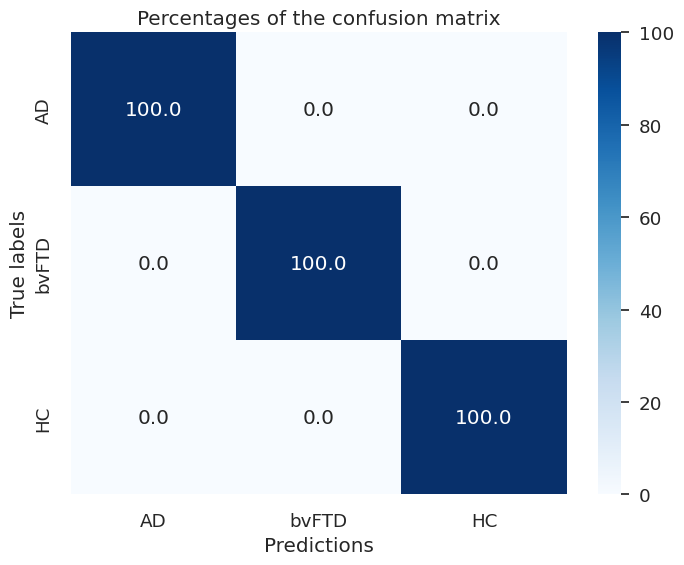

In [ ]:
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
# Grafica la matriz de confusión con porcentajes
sns.heatmap(conf_matrix_percent, annot=True, fmt='.1f', cmap='Blues', cbar=True,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predictions')
plt.ylabel('True labels')
plt.title('Percentages of the confusion matrix')
plt.savefig('Matriz_Confusion_Porcentajes.pdf')
plt.show()

In [ ]:
# Generar el informe de clasificación
report = classification_report(y_true, y_pred_classes, target_names=classes)
print(report)

              precision    recall  f1-score   support

          AD       1.00      1.00      1.00         6
       bvFTD       1.00      1.00      1.00         3
          HC       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



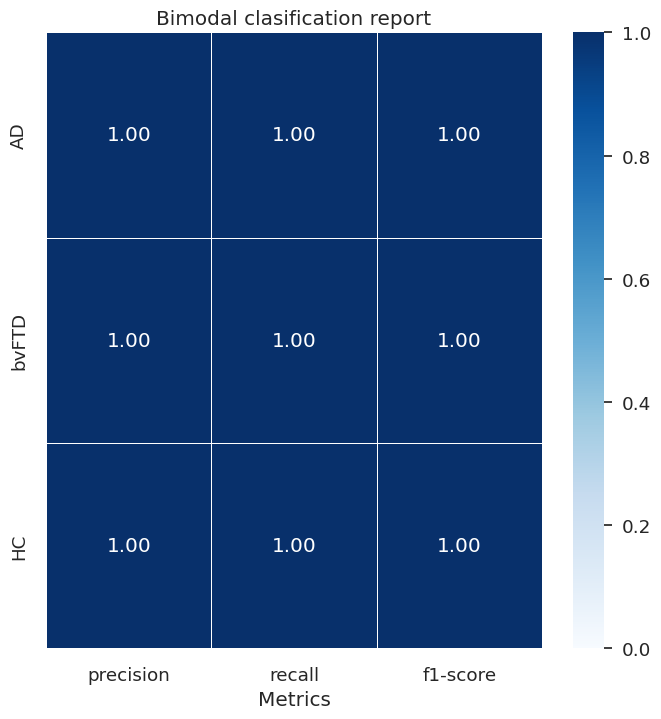

In [ ]:
report = classification_report(y_true, y_pred_classes, output_dict=True, target_names=classes)
# Eliminar 'accuracy', 'macro avg' y 'weighted avg' para centrarnos en las clases y micro avg
del  report['macro avg'], report['weighted avg']

# Convertir el reporte en DataFrame de Pandas
df_report = pd.DataFrame(report).transpose()

# Crear el mapa de calor para la cuadrícula
plt.figure(figsize=(8, 8))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, fmt=".2f", cmap='Blues', linewidths=.5, vmin=0, vmax=1)
plt.title('Bimodal clasification report')
plt.xlabel('Metrics')
plt.savefig('heatmap_reportimg.pdf')
plt.show()

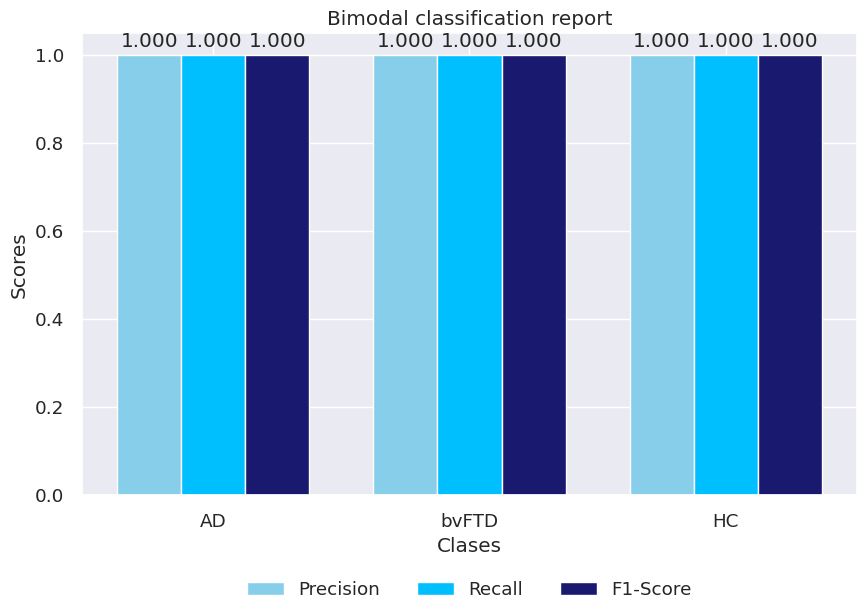

In [ ]:
report = classification_report(y_true, y_pred_classes, digits=4, output_dict=True, zero_division=0, target_names=classes)

# Eliminar 'accuracy' y 'macro avg' para centrarnos en las clases y micro avg
del report['macro avg'], report['weighted avg']

# Extraer datos para la gráfica
labels = classes
precision = [report[label]['precision'] for label in labels]
recall = [report[label]['recall'] for label in labels]
f1_score = [report[label]['f1-score'] for label in labels]
support = [report[label]['support'] for label in labels]

# Tamaño de la gráfica
fig, ax = plt.subplots(figsize=(10, 6))

# Índices para las barras
index = np.arange(len(labels))
bar_width = 0.25

# Crear barras para precision, recall y f1-score
rects1 = ax.bar(index, precision, bar_width, label='Precision', color='skyblue')
rects2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='deepskyblue')
rects3 = ax.bar(index + 2 * bar_width, f1_score, bar_width, label='F1-Score', color='midnightblue')


# Añadir etiquetas, leyenda, título y ejes
ax.set_xlabel('Clases')
ax.set_ylabel('Scores')
ax.set_title('Bimodal classification report')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)

# Colocar la leyenda debajo del gráfico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)

# Función para añadir etiquetas de texto a las barras
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Añadir etiquetas a cada barra
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

# Mostrar la gráfica
plt.savefig('classification_reportimg.pdf')
plt.show()

# Validacion cruzada

In [ ]:
#@title STFT AvCvF
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import os
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.model_selection import StratifiedKFold

# Configuración
n_splits = 5  # Número de folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Parámetros del entrenamiento
batch_size = 128
epochs = 500
model_name_template = "exp_cmex_3class_model_fold_{}"

# Ruta base para los logs
path_log_base = '/content/logs'
os.makedirs(path_log_base, exist_ok=True)

# Listas para almacenar los resultados de cada fold
metrics_summary = []

# Realizar Cross-Validation
for fold, (train_idx, test_idx) in enumerate(skf.split(flat_features, labels_stft)):
    print(f"--- Fold {fold + 1}/{n_splits} ---")

    # Dividir los datos en entrenamiento y prueba
    X_train1_fold, X_test1_fold = flat_features[train_idx], flat_features[test_idx]
    X_train_fold, X_test_fold = eeg_data[train_idx], eeg_data[test_idx]
    y_train_fold, y_test_fold = labels_stft[train_idx], labels_stft[test_idx]
    #standar scaler a los datos planos
    scaler = StandardScaler()
    X_train1_fold = scaler.fit_transform(X_train1_fold)
    X_test1_fold = scaler.transform(X_test1_fold)
    print(f'X_train1_fold: {X_train1_fold.shape}')
    print(f'X_test1_fold: {X_test1_fold.shape}')
    # Crear un nuevo modelo para este fold
    model = new_arch()

    # Entrenar el modelo
    log_dir = f"{path_log_base}/{model_name_template.format(fold + 1)}"
    train(
        model=model,
        X_train1=X_train1_fold, X_train=X_train_fold, y_train=y_train_fold,
        X_valid1=X_test1_fold, X_valid=X_test_fold, y_valid=y_test_fold,
        X_test1=X_test1_fold, X_test=X_test_fold, y_test=y_test_fold,
        batch_size=batch_size, epochs=epochs,
        model_name=model_name_template.format(fold + 1)
    )

    # Evaluar el mejor modelo guardado en el fold
    print(f"Evaluating the best model from fold {fold + 1}...")
    model_files = [f for f in os.listdir(log_dir) if f.endswith(".hdf5")]
    best_model_filename = sorted(
        model_files,
        key=lambda x: float(x.split('-')[-1].replace('.hdf5', '')),
        reverse=True
    )[0]  # Seleccionar el modelo con la mejor val_accuracy
    best_model = load_model(f"{log_dir}/{best_model_filename}")

    # Predecir en el conjunto de prueba
    y_pred_test = best_model.predict([X_test1_fold, X_test_fold])
    y_pred_test = np.argmax(y_pred_test, axis=1)  # Convertir a etiquetas categóricas
    y_test_true = y_test_fold  # Etiquetas verdaderas

    # Calcular métricas
    fold_metrics = {
        "Fold": fold + 1,
        "Accuracy": accuracy_score(y_test_true, y_pred_test),
        "Precision": precision_score(y_test_true, y_pred_test, average='weighted'),
        "Recall": recall_score(y_test_true, y_pred_test, average='weighted'),
        "F1-Score": f1_score(y_test_true, y_pred_test, average='weighted')
    }

    # Mostrar reporte de clasificación
    print("\nClassification Report:")
    print(classification_report(y_test_true, y_pred_test, target_names=["Class_A", "Class_C","Class_F"]))

    # Guardar métricas del fold
    metrics_summary.append(fold_metrics)
    print(f"Fold {fold + 1} - Metrics: {fold_metrics}")

# Mostrar resultados finales
print("\n--- Cross-Validation Results ---")
metrics_df = pd.DataFrame(metrics_summary)
print(metrics_df)

# Calcular promedios y desviaciones estándar
mean_metrics = metrics_df.mean(axis=0)
std_metrics = metrics_df.std(axis=0)

print("\nMean Metrics:")
print(mean_metrics)
print("\nStandard Deviation Metrics:")
print(std_metrics)

# Guardar métricas en un archivo CSV
metrics_df.to_csv(f"{path_log_base}/cross_validation_metrics.csv", index=False)

--- Fold 1/5 ---
X_train1_fold: (46, 21)
X_test1_fold: (12, 21)
Ultima capa input b(None, 10, 128)
Ultima capa input a(None, 14, 14, 512)
(None, 14, 14, 512)
layer: (None, 10, 128)
encoded_patches: (None, 1, 128)
attn_1_to_2: (None, 10, 128)
attn_2_to_1: (None, 1, 128)
(None, 11, 128)
Transformer_create
Starting the training...
Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 - 143s - loss: 1.9307 - accuracy: 0.2609 - val_loss: 1.2335 - val_accuracy: 0.6667 - 143s/epoch - 143s/step
Epoch 2/500
1/1 - 8s - loss: 1.0668 - accuracy: 0.6957 - val_loss: 1.2360 - val_accuracy: 0.6667 - 8s/epoch - 8s/step
Epoch 3/500
1/1 - 8s - loss: 0.8054 - accuracy: 0.7609 - val_loss: 1.2127 - val_accuracy: 0.5000 - 8s/epoch - 8s/step
Epoch 4/500
1/1 - 10s - loss: 0.6651 - accuracy: 0.8261 - val_loss: 1.2912 - val_accuracy: 0.7500 - 10s/epoch - 10s/step
Epoch 5/500
1/1 - 8s - loss: 0.5210 - accuracy: 0.8913 - val_loss: 1.2951 - val_accuracy: 0.5000 - 8s/epoch - 8s/step
Epoch 6/500
1/1 - 8s - loss: 0.5865 - accuracy: 0.8478 - val_loss: 1.2866 - val_accuracy: 0.5000 - 8s/epoch - 8s/step
Epoch 7/500
1/1 - 8s - loss: 0.4288 - accuracy: 0.9565 - val_loss: 1.2761 - val_accuracy: 0.5000 - 8s/epoch - 8s/step
Epoch 8/500
1/1 - 8s - loss: 0.4535 - accuracy: 0.9130 - val_loss: 1.2745 - val_accuracy: 0.5000 - 8s/epoch - 8s/step
Epoch 9/500
1/1 - 8s - loss: 0.4169 - accuracy: 1.0000 - va

Loss=1.2912 y Accuracy=0.7500

saved-model-043-0.6667.hdf5


Loss=1.0459 y Accuracy=0.6667

saved-model-044-0.7500.hdf5
Loss=0.9957 y Accuracy=0.7500

saved-model-052-0.8333.hdf5
Loss=0.8513 y Accuracy=0.8333

saved-model-069-0.8333.hdf5
Loss=0.8191 y Accuracy=0.8333

saved-model-072-0.9167.hdf5
Loss=0.7425 y Accuracy=0.9167

saved-model-077-0.9167.hdf5
Loss=0.6048 y Accuracy=0.9167



Best
saved-model-072-0.9167.hdf5
Loss=0.7425 y Accuracy=0.9167

Evaluating the best model from fold 1...
1/1 [==============================] - 6s 6s/step

Classification Report:
              precision    recall  f1-score   support

     Class_A       0.86      1.00      0.92         6
     Class_C       1.00      1.00      1.00         3
     Class_F       1.00      0.67      0.80         3

    accuracy                           0.92        12
   macro avg       0.95      0.89      0.91        12
weighted avg       0.93      0.92      0.91        12

Fold 1 - Metrics: {'Fold': 1, 'Accuracy': 0.9166666666666666, 'Precision': 0.9285714285714285, 'Recall': 0.91666

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 - 132s - loss: 1.7767 - accuracy: 0.3913 - val_loss: 1.2333 - val_accuracy: 0.4167 - 132s/epoch - 132s/step
Epoch 2/500
1/1 - 8s - loss: 0.9508 - accuracy: 0.7391 - val_loss: 1.2080 - val_accuracy: 0.4167 - 8s/epoch - 8s/step
Epoch 3/500
1/1 - 10s - loss: 0.7565 - accuracy: 0.7826 - val_loss: 1.2033 - val_accuracy: 0.5000 - 10s/epoch - 10s/step
Epoch 4/500
1/1 - 8s - loss: 0.6992 - accuracy: 0.8043 - val_loss: 1.4004 - val_accuracy: 0.3333 - 8s/epoch - 8s/step
Epoch 5/500
1/1 - 8s - loss: 0.5933 - accuracy: 0.9130 - val_loss: 1.4077 - val_accuracy: 0.3333 - 8s/epoch - 8s/step
Epoch 6/500
1/1 - 8s - loss: 0.6277 - accuracy: 0.8043 - val_loss: 1.3879 - val_accuracy: 0.3333 - 8s/epoch - 8s/step
Epoch 7/500
1/1 - 8s - loss: 0.5714 - accuracy: 0.8696 - val_loss: 1.4153 - val_accuracy: 0.3333 - 8s/epoch - 8s/step
Epoch 8/500
1/1 - 8s - loss: 0.5477 - accuracy: 0.8478 - val_loss: 1.4290 - val_accuracy: 0.3333 - 8s/epoch - 8s/step
Epoch 9/500
1/1 - 8s - loss: 0.4480 - accuracy: 0.9565 - va

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 - 142s - loss: 2.1822 - accuracy: 0.2174 - val_loss: 1.2683 - val_accuracy: 0.2500 - 142s/epoch - 142s/step
Epoch 2/500
1/1 - 8s - loss: 1.3541 - accuracy: 0.5435 - val_loss: 1.2524 - val_accuracy: 0.2500 - 8s/epoch - 8s/step
Epoch 3/500
1/1 - 8s - loss: 0.8857 - accuracy: 0.7174 - val_loss: 1.3700 - val_accuracy: 0.1667 - 8s/epoch - 8s/step
Epoch 4/500
1/1 - 9s - loss: 0.9129 - accuracy: 0.7174 - val_loss: 1.8712 - val_accuracy: 0.1667 - 9s/epoch - 9s/step
Epoch 5/500
1/1 - 8s - loss: 0.8317 - accuracy: 0.7826 - val_loss: 1.8698 - val_accuracy: 0.1667 - 8s/epoch - 8s/step
Epoch 6/500
1/1 - 8s - loss: 0.6675 - accuracy: 0.8261 - val_loss: 1.8427 - val_accuracy: 0.1667 - 8s/epoch - 8s/step
Epoch 7/500
1/1 - 8s - loss: 0.5719 - accuracy: 0.8913 - val_loss: 1.8225 - val_accuracy: 0.1667 - 8s/epoch - 8s/step
Epoch 8/500
1/1 - 8s - loss: 0.5115 - accuracy: 0.9348 - val_loss: 1.7240 - val_accuracy: 0.1667 - 8s/epoch - 8s/step
Epoch 9/500
1/1 - 8s - loss: 0.5572 - accuracy: 0.9130 - val_l

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 - 148s - loss: 2.0422 - accuracy: 0.2979 - val_loss: 1.2657 - val_accuracy: 0.4545 - 148s/epoch - 148s/step
Epoch 2/500
1/1 - 8s - loss: 1.1176 - accuracy: 0.6383 - val_loss: 1.2710 - val_accuracy: 0.4545 - 8s/epoch - 8s/step
Epoch 3/500
1/1 - 8s - loss: 0.9372 - accuracy: 0.7234 - val_loss: 1.3127 - val_accuracy: 0.4545 - 8s/epoch - 8s/step
Epoch 4/500
1/1 - 8s - loss: 0.7345 - accuracy: 0.8298 - val_loss: 1.2971 - val_accuracy: 0.4545 - 8s/epoch - 8s/step
Epoch 5/500
1/1 - 8s - loss: 0.6433 - accuracy: 0.8085 - val_loss: 1.3163 - val_accuracy: 0.2727 - 8s/epoch - 8s/step
Epoch 6/500
1/1 - 8s - loss: 0.5908 - accuracy: 0.8723 - val_loss: 1.3286 - val_accuracy: 0.2727 - 8s/epoch - 8s/step
Epoch 7/500
1/1 - 8s - loss: 0.5375 - accuracy: 0.8936 - val_loss: 1.3347 - val_accuracy: 0.2727 - 8s/epoch - 8s/step
Epoch 8/500
1/1 - 8s - loss: 0.4851 - accuracy: 0.9574 - val_loss: 1.3326 - val_accuracy: 0.2727 - 8s/epoch - 8s/step
Epoch 9/500
1/1 - 8s - loss: 0.4642 - accuracy: 0.9149 - val_l

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 - 135s - loss: 1.8446 - accuracy: 0.4043 - val_loss: 1.2892 - val_accuracy: 0.4545 - 135s/epoch - 135s/step
Epoch 2/500
1/1 - 11s - loss: 1.1742 - accuracy: 0.5957 - val_loss: 1.2647 - val_accuracy: 0.5455 - 11s/epoch - 11s/step
Epoch 3/500
1/1 - 8s - loss: 0.9017 - accuracy: 0.7021 - val_loss: 1.2666 - val_accuracy: 0.4545 - 8s/epoch - 8s/step
Epoch 4/500
1/1 - 8s - loss: 0.7793 - accuracy: 0.8085 - val_loss: 1.2967 - val_accuracy: 0.2727 - 8s/epoch - 8s/step
Epoch 5/500
1/1 - 8s - loss: 0.6243 - accuracy: 0.8723 - val_loss: 1.3229 - val_accuracy: 0.2727 - 8s/epoch - 8s/step
Epoch 6/500
1/1 - 8s - loss: 0.5188 - accuracy: 0.9149 - val_loss: 1.3116 - val_accuracy: 0.2727 - 8s/epoch - 8s/step
Epoch 7/500
1/1 - 8s - loss: 0.4635 - accuracy: 0.9574 - val_loss: 1.3380 - val_accuracy: 0.2727 - 8s/epoch - 8s/step
Epoch 8/500
1/1 - 8s - loss: 0.3923 - accuracy: 1.0000 - val_loss: 1.4002 - val_accuracy: 0.2727 - 8s/epoch - 8s/step
Epoch 9/500
1/1 - 8s - loss: 0.4473 - accuracy: 0.9362 - va

1/1 [==============================] - 11s 11s/step

Classification Report:
              precision    recall  f1-score   support

     Class_A       0.83      1.00      0.91         5
     Class_C       1.00      1.00      1.00         3
     Class_F       1.00      0.67      0.80         3

    accuracy                           0.91        11
   macro avg       0.94      0.89      0.90        11
weighted avg       0.92      0.91      0.90        11

Fold 5 - Metrics: {'Fold': 5, 'Accuracy': 0.9090909090909091, 'Precision': 0.9242424242424243, 'Recall': 0.9090909090909091, 'F1-Score': 0.9041322314049587}

--- Cross-Validation Results ---
   Fold  Accuracy  Precision    Recall  F1-Score
0     1  0.916667   0.928571  0.916667  0.911538
1     2  1.000000   1.000000  1.000000  1.000000
2     3  1.000000   1.000000  1.000000  1.000000
3     4  0.909091   0.931818  0.909091  0.910534
4     5  0.909091   0.924242  0.909091  0.904132

Mean Metrics:
Fold         3.000000
Accuracy     0.946970

# Imputados

In [ ]:
#@title STFT AvCvF
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import os
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.model_selection import StratifiedKFold

# Configuración
n_splits = 5  # Número de folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Parámetros del entrenamiento
batch_size = 128
epochs = 500
model_name_template = "exp_cmex_3class_model_fold_{}"

# Ruta base para los logs
path_log_base = '/content/logs'
os.makedirs(path_log_base, exist_ok=True)

# Listas para almacenar los resultados de cada fold
metrics_summary = []

# Realizar Cross-Validation
for fold, (train_idx, test_idx) in enumerate(skf.split(flat_features, labels_stft)):
    print(f"--- Fold {fold + 1}/{n_splits} ---")

    # Dividir los datos en entrenamiento y prueba
    X_train1_fold, X_test1_fold = flat_features[train_idx], flat_features[test_idx]
    X_train_fold, X_test_fold = eeg_data[train_idx], eeg_data[test_idx]
    y_train_fold, y_test_fold = labels_stft[train_idx], labels_stft[test_idx]
    #standar scaler a los datos planos
    scaler = StandardScaler()
    X_train1_fold = scaler.fit_transform(X_train1_fold)
    X_test1_fold = scaler.transform(X_test1_fold)
    print(f'X_train1_fold: {X_train1_fold.shape}')
    print(f'X_test1_fold: {X_test1_fold.shape}')
    # Crear un nuevo modelo para este fold
    model = new_arch()

    # Entrenar el modelo
    log_dir = f"{path_log_base}/{model_name_template.format(fold + 1)}"
    train(
        model=model,
        X_train1=X_train1_fold, X_train=X_train_fold, y_train=y_train_fold,
        X_valid1=X_test1_fold, X_valid=X_test_fold, y_valid=y_test_fold,
        X_test1=X_test1_fold, X_test=X_test_fold, y_test=y_test_fold,
        batch_size=batch_size, epochs=epochs,
        model_name=model_name_template.format(fold + 1)
    )

    # Evaluar el mejor modelo guardado en el fold
    print(f"Evaluating the best model from fold {fold + 1}...")
    model_files = [f for f in os.listdir(log_dir) if f.endswith(".hdf5")]
    best_model_filename = sorted(
        model_files,
        key=lambda x: float(x.split('-')[-1].replace('.hdf5', '')),
        reverse=True
    )[0]  # Seleccionar el modelo con la mejor val_accuracy
    best_model = load_model(f"{log_dir}/{best_model_filename}")

    # Predecir en el conjunto de prueba
    y_pred_test = best_model.predict([X_test1_fold, X_test_fold])
    y_pred_test = np.argmax(y_pred_test, axis=1)  # Convertir a etiquetas categóricas
    y_test_true = y_test_fold  # Etiquetas verdaderas

    # Calcular métricas
    fold_metrics = {
        "Fold": fold + 1,
        "Accuracy": accuracy_score(y_test_true, y_pred_test),
        "Precision": precision_score(y_test_true, y_pred_test, average='weighted'),
        "Recall": recall_score(y_test_true, y_pred_test, average='weighted'),
        "F1-Score": f1_score(y_test_true, y_pred_test, average='weighted')
    }

    # Mostrar reporte de clasificación
    print("\nClassification Report:")
    print(classification_report(y_test_true, y_pred_test, target_names=["Class_A", "Class_C","Class_F"]))

    # Guardar métricas del fold
    metrics_summary.append(fold_metrics)
    print(f"Fold {fold + 1} - Metrics: {fold_metrics}")

# Mostrar resultados finales
print("\n--- Cross-Validation Results ---")
metrics_df = pd.DataFrame(metrics_summary)
print(metrics_df)

# Calcular promedios y desviaciones estándar
mean_metrics = metrics_df.mean(axis=0)
std_metrics = metrics_df.std(axis=0)

print("\nMean Metrics:")
print(mean_metrics)
print("\nStandard Deviation Metrics:")
print(std_metrics)

# Guardar métricas en un archivo CSV
metrics_df.to_csv(f"{path_log_base}/cross_validation_metrics.csv", index=False)

--- Fold 1/5 ---
X_train1_fold: (46, 21)
X_test1_fold: (12, 21)
Ultima capa input b(None, 10, 128)
Ultima capa input a(None, 14, 14, 512)
(None, 14, 14, 512)
layer: (None, 10, 128)
encoded_patches: (None, 1, 128)
attn_1_to_2: (None, 10, 128)
attn_2_to_1: (None, 1, 128)
(None, 11, 128)
Transformer_create
Starting the training...
Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 - 143s - loss: 1.9307 - accuracy: 0.2609 - val_loss: 1.2335 - val_accuracy: 0.6667 - 143s/epoch - 143s/step
Epoch 2/500
1/1 - 8s - loss: 1.0668 - accuracy: 0.6957 - val_loss: 1.2360 - val_accuracy: 0.6667 - 8s/epoch - 8s/step
Epoch 3/500
1/1 - 8s - loss: 0.8054 - accuracy: 0.7609 - val_loss: 1.2127 - val_accuracy: 0.5000 - 8s/epoch - 8s/step
Epoch 4/500
1/1 - 10s - loss: 0.6651 - accuracy: 0.8261 - val_loss: 1.2912 - val_accuracy: 0.7500 - 10s/epoch - 10s/step
Epoch 5/500
1/1 - 8s - loss: 0.5210 - accuracy: 0.8913 - val_loss: 1.2951 - val_accuracy: 0.5000 - 8s/epoch - 8s/step
Epoch 6/500
1/1 - 8s - loss: 0.5865 - accuracy: 0.8478 - val_loss: 1.2866 - val_accuracy: 0.5000 - 8s/epoch - 8s/step
Epoch 7/500
1/1 - 8s - loss: 0.4288 - accuracy: 0.9565 - val_loss: 1.2761 - val_accuracy: 0.5000 - 8s/epoch - 8s/step
Epoch 8/500
1/1 - 8s - loss: 0.4535 - accuracy: 0.9130 - val_loss: 1.2745 - val_accuracy: 0.5000 - 8s/epoch - 8s/step
Epoch 9/500
1/1 - 8s - loss: 0.4169 - accuracy: 1.0000 - va

Loss=1.2912 y Accuracy=0.7500

saved-model-043-0.6667.hdf5


Loss=1.0459 y Accuracy=0.6667

saved-model-044-0.7500.hdf5
Loss=0.9957 y Accuracy=0.7500

saved-model-052-0.8333.hdf5
Loss=0.8513 y Accuracy=0.8333

saved-model-069-0.8333.hdf5
Loss=0.8191 y Accuracy=0.8333

saved-model-072-0.9167.hdf5
Loss=0.7425 y Accuracy=0.9167

saved-model-077-0.9167.hdf5
Loss=0.6048 y Accuracy=0.9167



Best
saved-model-072-0.9167.hdf5
Loss=0.7425 y Accuracy=0.9167

Evaluating the best model from fold 1...
1/1 [==============================] - 6s 6s/step

Classification Report:
              precision    recall  f1-score   support

     Class_A       0.86      1.00      0.92         6
     Class_C       1.00      1.00      1.00         3
     Class_F       1.00      0.67      0.80         3

    accuracy                           0.92        12
   macro avg       0.95      0.89      0.91        12
weighted avg       0.93      0.92      0.91        12

Fold 1 - Metrics: {'Fold': 1, 'Accuracy': 0.9166666666666666, 'Precision': 0.9285714285714285, 'Recall': 0.91666

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 - 132s - loss: 1.7767 - accuracy: 0.3913 - val_loss: 1.2333 - val_accuracy: 0.4167 - 132s/epoch - 132s/step
Epoch 2/500
1/1 - 8s - loss: 0.9508 - accuracy: 0.7391 - val_loss: 1.2080 - val_accuracy: 0.4167 - 8s/epoch - 8s/step
Epoch 3/500
1/1 - 10s - loss: 0.7565 - accuracy: 0.7826 - val_loss: 1.2033 - val_accuracy: 0.5000 - 10s/epoch - 10s/step
Epoch 4/500
1/1 - 8s - loss: 0.6992 - accuracy: 0.8043 - val_loss: 1.4004 - val_accuracy: 0.3333 - 8s/epoch - 8s/step
Epoch 5/500
1/1 - 8s - loss: 0.5933 - accuracy: 0.9130 - val_loss: 1.4077 - val_accuracy: 0.3333 - 8s/epoch - 8s/step
Epoch 6/500
1/1 - 8s - loss: 0.6277 - accuracy: 0.8043 - val_loss: 1.3879 - val_accuracy: 0.3333 - 8s/epoch - 8s/step
Epoch 7/500
1/1 - 8s - loss: 0.5714 - accuracy: 0.8696 - val_loss: 1.4153 - val_accuracy: 0.3333 - 8s/epoch - 8s/step
Epoch 8/500
1/1 - 8s - loss: 0.5477 - accuracy: 0.8478 - val_loss: 1.4290 - val_accuracy: 0.3333 - 8s/epoch - 8s/step
Epoch 9/500
1/1 - 8s - loss: 0.4480 - accuracy: 0.9565 - va

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 - 142s - loss: 2.1822 - accuracy: 0.2174 - val_loss: 1.2683 - val_accuracy: 0.2500 - 142s/epoch - 142s/step
Epoch 2/500
1/1 - 8s - loss: 1.3541 - accuracy: 0.5435 - val_loss: 1.2524 - val_accuracy: 0.2500 - 8s/epoch - 8s/step
Epoch 3/500
1/1 - 8s - loss: 0.8857 - accuracy: 0.7174 - val_loss: 1.3700 - val_accuracy: 0.1667 - 8s/epoch - 8s/step
Epoch 4/500
1/1 - 9s - loss: 0.9129 - accuracy: 0.7174 - val_loss: 1.8712 - val_accuracy: 0.1667 - 9s/epoch - 9s/step
Epoch 5/500
1/1 - 8s - loss: 0.8317 - accuracy: 0.7826 - val_loss: 1.8698 - val_accuracy: 0.1667 - 8s/epoch - 8s/step
Epoch 6/500
1/1 - 8s - loss: 0.6675 - accuracy: 0.8261 - val_loss: 1.8427 - val_accuracy: 0.1667 - 8s/epoch - 8s/step
Epoch 7/500
1/1 - 8s - loss: 0.5719 - accuracy: 0.8913 - val_loss: 1.8225 - val_accuracy: 0.1667 - 8s/epoch - 8s/step
Epoch 8/500
1/1 - 8s - loss: 0.5115 - accuracy: 0.9348 - val_loss: 1.7240 - val_accuracy: 0.1667 - 8s/epoch - 8s/step
Epoch 9/500
1/1 - 8s - loss: 0.5572 - accuracy: 0.9130 - val_l

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 - 148s - loss: 2.0422 - accuracy: 0.2979 - val_loss: 1.2657 - val_accuracy: 0.4545 - 148s/epoch - 148s/step
Epoch 2/500
1/1 - 8s - loss: 1.1176 - accuracy: 0.6383 - val_loss: 1.2710 - val_accuracy: 0.4545 - 8s/epoch - 8s/step
Epoch 3/500
1/1 - 8s - loss: 0.9372 - accuracy: 0.7234 - val_loss: 1.3127 - val_accuracy: 0.4545 - 8s/epoch - 8s/step
Epoch 4/500
1/1 - 8s - loss: 0.7345 - accuracy: 0.8298 - val_loss: 1.2971 - val_accuracy: 0.4545 - 8s/epoch - 8s/step
Epoch 5/500
1/1 - 8s - loss: 0.6433 - accuracy: 0.8085 - val_loss: 1.3163 - val_accuracy: 0.2727 - 8s/epoch - 8s/step
Epoch 6/500
1/1 - 8s - loss: 0.5908 - accuracy: 0.8723 - val_loss: 1.3286 - val_accuracy: 0.2727 - 8s/epoch - 8s/step
Epoch 7/500
1/1 - 8s - loss: 0.5375 - accuracy: 0.8936 - val_loss: 1.3347 - val_accuracy: 0.2727 - 8s/epoch - 8s/step
Epoch 8/500
1/1 - 8s - loss: 0.4851 - accuracy: 0.9574 - val_loss: 1.3326 - val_accuracy: 0.2727 - 8s/epoch - 8s/step
Epoch 9/500
1/1 - 8s - loss: 0.4642 - accuracy: 0.9149 - val_l

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 - 135s - loss: 1.8446 - accuracy: 0.4043 - val_loss: 1.2892 - val_accuracy: 0.4545 - 135s/epoch - 135s/step
Epoch 2/500
1/1 - 11s - loss: 1.1742 - accuracy: 0.5957 - val_loss: 1.2647 - val_accuracy: 0.5455 - 11s/epoch - 11s/step
Epoch 3/500
1/1 - 8s - loss: 0.9017 - accuracy: 0.7021 - val_loss: 1.2666 - val_accuracy: 0.4545 - 8s/epoch - 8s/step
Epoch 4/500
1/1 - 8s - loss: 0.7793 - accuracy: 0.8085 - val_loss: 1.2967 - val_accuracy: 0.2727 - 8s/epoch - 8s/step
Epoch 5/500
1/1 - 8s - loss: 0.6243 - accuracy: 0.8723 - val_loss: 1.3229 - val_accuracy: 0.2727 - 8s/epoch - 8s/step
Epoch 6/500
1/1 - 8s - loss: 0.5188 - accuracy: 0.9149 - val_loss: 1.3116 - val_accuracy: 0.2727 - 8s/epoch - 8s/step
Epoch 7/500
1/1 - 8s - loss: 0.4635 - accuracy: 0.9574 - val_loss: 1.3380 - val_accuracy: 0.2727 - 8s/epoch - 8s/step
Epoch 8/500
1/1 - 8s - loss: 0.3923 - accuracy: 1.0000 - val_loss: 1.4002 - val_accuracy: 0.2727 - 8s/epoch - 8s/step
Epoch 9/500
1/1 - 8s - loss: 0.4473 - accuracy: 0.9362 - va

1/1 [==============================] - 11s 11s/step

Classification Report:
              precision    recall  f1-score   support

     Class_A       0.83      1.00      0.91         5
     Class_C       1.00      1.00      1.00         3
     Class_F       1.00      0.67      0.80         3

    accuracy                           0.91        11
   macro avg       0.94      0.89      0.90        11
weighted avg       0.92      0.91      0.90        11

Fold 5 - Metrics: {'Fold': 5, 'Accuracy': 0.9090909090909091, 'Precision': 0.9242424242424243, 'Recall': 0.9090909090909091, 'F1-Score': 0.9041322314049587}

--- Cross-Validation Results ---
   Fold  Accuracy  Precision    Recall  F1-Score
0     1  0.916667   0.928571  0.916667  0.911538
1     2  1.000000   1.000000  1.000000  1.000000
2     3  1.000000   1.000000  1.000000  1.000000
3     4  0.909091   0.931818  0.909091  0.910534
4     5  0.909091   0.924242  0.909091  0.904132

Mean Metrics:
Fold         3.000000
Accuracy     0.946970

# Entrenamiento

In [ ]:
# @title 58 standar scaler features without moca_total,ifs_total_score
batch_size = 128
epochs = 500
model_name = "Bimodal_EEG+Data_clean"

# Llamar a la función de entrenamiento
results = train(
    model=model,
    X_train1=X_train_flat, X_train=X_train_img, y_train=y_train,  # Datos planos y Wavs para entrenamiento
    X_valid1=X_test_flat, X_valid=X_test_img, y_valid=y_test,     # Usar datos planos y Wavs de X_test como validación
    X_test1=X_test_flat, X_test=X_test_img, y_test=y_test,        # Conjunto de prueba
    batch_size=batch_size, epochs=epochs,
    model_name=model_name
)

Starting the training...
Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 - 133s - loss: 2.0701 - accuracy: 0.2826 - val_loss: 1.3069 - val_accuracy: 0.5000 - 133s/epoch - 133s/step
Epoch 2/500
1/1 - 7s - loss: 1.6061 - accuracy: 0.4348 - val_loss: 1.2758 - val_accuracy: 0.5000 - 7s/epoch - 7s/step
Epoch 3/500
1/1 - 7s - loss: 0.9846 - accuracy: 0.6739 - val_loss: 1.2745 - val_accuracy: 0.5000 - 7s/epoch - 7s/step
Epoch 4/500
1/1 - 8s - loss: 0.8677 - accuracy: 0.7391 - val_loss: 1.2997 - val_accuracy: 0.2500 - 8s/epoch - 8s/step
Epoch 5/500
1/1 - 7s - loss: 0.6387 - accuracy: 0.8261 - val_loss: 1.2654 - val_accuracy: 0.5000 - 7s/epoch - 7s/step
Epoch 6/500
1/1 - 8s - loss: 0.5418 - accuracy: 0.9348 - val_loss: 1.2516 - val_accuracy: 0.5000 - 8s/epoch - 8s/step
Epoch 7/500
1/1 - 7s - loss: 0.5760 - accuracy: 0.8696 - val_loss: 1.2525 - val_accuracy: 0.5000 - 7s/epoch - 7s/step
Epoch 8/500
1/1 - 7s - loss: 0.5002 - accuracy: 0.9348 - val_loss: 1.2566 - val_accuracy: 0.5000 - 7s/epoch - 7s/step
Epoch 9/500
1/1 - 7s - loss: 0.4846 - accuracy: 0.9130 - val_l

Loss=0.4905 y Accuracy=1.0000



Best
saved-model-257-1.0000.hdf5
Loss=0.4905 y Accuracy=1.0000



In [ ]:
# @title 85 standar scaler 21 features
batch_size = 128
epochs = 500
model_name = "Bimodal_EEG+Data_clean"

# Llamar a la función de entrenamiento
results = train(
    model=model,
    X_train1=X_train_flat, X_train=X_train_img, y_train=y_train,  # Datos planos y Wavs para entrenamiento
    X_valid1=X_test_flat, X_valid=X_test_img, y_valid=y_test,     # Usar datos planos y Wavs de X_test como validación
    X_test1=X_test_flat, X_test=X_test_img, y_test=y_test,        # Conjunto de prueba
    batch_size=batch_size, epochs=epochs,
    model_name=model_name
)

Starting the training...
Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 - 147s - loss: 1.5632 - accuracy: 0.3971 - val_loss: 1.2558 - val_accuracy: 0.5294 - 147s/epoch - 147s/step
Epoch 2/500
1/1 - 7s - loss: 1.3054 - accuracy: 0.5735 - val_loss: 1.2528 - val_accuracy: 0.5294 - 7s/epoch - 7s/step
Epoch 3/500
1/1 - 7s - loss: 0.9673 - accuracy: 0.7059 - val_loss: 1.2455 - val_accuracy: 0.4706 - 7s/epoch - 7s/step
Epoch 4/500
1/1 - 7s - loss: 0.7298 - accuracy: 0.8382 - val_loss: 1.3158 - val_accuracy: 0.3529 - 7s/epoch - 7s/step
Epoch 5/500
1/1 - 7s - loss: 0.6248 - accuracy: 0.8529 - val_loss: 1.3236 - val_accuracy: 0.3529 - 7s/epoch - 7s/step
Epoch 6/500
1/1 - 7s - loss: 0.5949 - accuracy: 0.8824 - val_loss: 1.3339 - val_accuracy: 0.3529 - 7s/epoch - 7s/step
Epoch 7/500
1/1 - 7s - loss: 0.5514 - accuracy: 0.9118 - val_loss: 1.3374 - val_accuracy: 0.3529 - 7s/epoch - 7s/step
Epoch 8/500
1/1 - 7s - loss: 0.5404 - accuracy: 0.8971 - val_loss: 1.3371 - val_accuracy: 0.3529 - 7s/epoch - 7s/step
Epoch 9/500
1/1 - 7s - loss: 0.5127 - accuracy: 0.9412 - val_l

In [ ]:
# @title 85 datos r42
batch_size = 128
epochs = 500
model_name = "Bimodal_EEG+Data_clean"

# Llamar a la función de entrenamiento
results = train(
    model=model,
    X_train1=X_train_flat, X_train=X_train_img, y_train=y_train,  # Datos planos y Wavs para entrenamiento
    X_valid1=X_test_flat, X_valid=X_test_img, y_valid=y_test,     # Usar datos planos y Wavs de X_test como validación
    X_test1=X_test_flat, X_test=X_test_img, y_test=y_test,        # Conjunto de prueba
    batch_size=batch_size, epochs=epochs,
    model_name=model_name
)

Starting the training...
Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 - 139s - loss: 1.4975 - accuracy: 0.4130 - val_loss: 1.3125 - val_accuracy: 0.2500 - 139s/epoch - 139s/step
Epoch 2/500
1/1 - 7s - loss: 1.5871 - accuracy: 0.4130 - val_loss: 1.3072 - val_accuracy: 0.2500 - 7s/epoch - 7s/step
Epoch 3/500
1/1 - 9s - loss: 1.3792 - accuracy: 0.4130 - val_loss: 1.2874 - val_accuracy: 0.5000 - 9s/epoch - 9s/step
Epoch 4/500
1/1 - 7s - loss: 0.9882 - accuracy: 0.6304 - val_loss: 1.3111 - val_accuracy: 0.5000 - 7s/epoch - 7s/step
Epoch 5/500
1/1 - 7s - loss: 0.8257 - accuracy: 0.7174 - val_loss: 1.3827 - val_accuracy: 0.5000 - 7s/epoch - 7s/step
Epoch 6/500
1/1 - 7s - loss: 0.8860 - accuracy: 0.7391 - val_loss: 1.4364 - val_accuracy: 0.5000 - 7s/epoch - 7s/step
Epoch 7/500
1/1 - 7s - loss: 0.6936 - accuracy: 0.8261 - val_loss: 1.3623 - val_accuracy: 0.5000 - 7s/epoch - 7s/step
Epoch 8/500
1/1 - 7s - loss: 0.5987 - accuracy: 0.8261 - val_loss: 1.4237 - val_accuracy: 0.5000 - 7s/epoch - 7s/step
Epoch 9/500
1/1 - 7s - loss: 0.5757 - accuracy: 0.8696 - val_l

Loss=1.3251 y Accuracy=0.6667

saved-model-077-0.7500.hdf5


Loss=1.2500 y Accuracy=0.7500



Best
saved-model-077-0.7500.hdf5
Loss=1.2500 y Accuracy=0.7500



In [ ]:
# @title 58 datos moca,ifs,demograf
batch_size = 128
epochs = 500
model_name = "Bimodal_EEG+Data_clean"

# Llamar a la función de entrenamiento
results = train(
    model=model,
    X_train1=X_train_flat, X_train=X_train_img, y_train=y_train,  # Datos planos y Wavs para entrenamiento
    X_valid1=X_test_flat, X_valid=X_test_img, y_valid=y_test,     # Usar datos planos y Wavs de X_test como validación
    X_test1=X_test_flat, X_test=X_test_img, y_test=y_test,        # Conjunto de prueba
    batch_size=batch_size, epochs=epochs,
    model_name=model_name
)

Starting the training...
Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 - 141s - loss: 1.8369 - accuracy: 0.2826 - val_loss: 1.2608 - val_accuracy: 0.5000 - 141s/epoch - 141s/step
Epoch 2/500
1/1 - 10s - loss: 1.1694 - accuracy: 0.6087 - val_loss: 1.2496 - val_accuracy: 0.5833 - 10s/epoch - 10s/step
Epoch 3/500
1/1 - 7s - loss: 1.0200 - accuracy: 0.6522 - val_loss: 1.2088 - val_accuracy: 0.5000 - 7s/epoch - 7s/step
Epoch 4/500
1/1 - 7s - loss: 0.9255 - accuracy: 0.7391 - val_loss: 1.2462 - val_accuracy: 0.5000 - 7s/epoch - 7s/step
Epoch 5/500
1/1 - 7s - loss: 0.8612 - accuracy: 0.7391 - val_loss: 1.2545 - val_accuracy: 0.5000 - 7s/epoch - 7s/step
Epoch 6/500
1/1 - 7s - loss: 0.7825 - accuracy: 0.8043 - val_loss: 1.3511 - val_accuracy: 0.2500 - 7s/epoch - 7s/step
Epoch 7/500
1/1 - 7s - loss: 0.7467 - accuracy: 0.8478 - val_loss: 1.3505 - val_accuracy: 0.2500 - 7s/epoch - 7s/step
Epoch 8/500
1/1 - 7s - loss: 0.7912 - accuracy: 0.7391 - val_loss: 1.3663 - val_accuracy: 0.2500 - 7s/epoch - 7s/step
Epoch 9/500
1/1 - 7s - loss: 0.6884 - accuracy: 0.7826 - va

Loss=0.9604 y Accuracy=0.7500

saved-model-122-0.8333.hdf5


Loss=0.8301 y Accuracy=0.8333



Best
saved-model-122-0.8333.hdf5
Loss=0.8301 y Accuracy=0.8333



In [ ]:
# @title 58 datos
batch_size = 128
epochs = 500
model_name = "Bimodal_EEG+Data_Clean"

# Llamar a la función de entrenamiento
results = train(
    model=model,
    X_train1=X_train_flat, X_train=X_train_img, y_train=y_train,  # Datos planos y Wavs para entrenamiento
    X_valid1=X_test_flat, X_valid=X_test_img, y_valid=y_test,     # Usar datos planos y Wavs de X_test como validación
    X_test1=X_test_flat, X_test=X_test_img, y_test=y_test,        # Conjunto de prueba
    batch_size=batch_size, epochs=epochs,
    model_name=model_name
)

Starting the training...
Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 - 144s - loss: 1.8290 - accuracy: 0.3043 - val_loss: 1.2953 - val_accuracy: 0.5000 - 144s/epoch - 144s/step
Epoch 2/500
1/1 - 7s - loss: 1.6884 - accuracy: 0.3478 - val_loss: 1.2950 - val_accuracy: 0.5000 - 7s/epoch - 7s/step
Epoch 3/500
1/1 - 7s - loss: 1.3073 - accuracy: 0.6087 - val_loss: 1.2758 - val_accuracy: 0.5000 - 7s/epoch - 7s/step
Epoch 4/500
1/1 - 7s - loss: 1.2269 - accuracy: 0.5217 - val_loss: 1.2611 - val_accuracy: 0.5000 - 7s/epoch - 7s/step
Epoch 5/500
1/1 - 7s - loss: 1.0604 - accuracy: 0.6087 - val_loss: 1.2745 - val_accuracy: 0.5000 - 7s/epoch - 7s/step
Epoch 6/500
1/1 - 7s - loss: 0.7713 - accuracy: 0.8261 - val_loss: 1.2760 - val_accuracy: 0.5000 - 7s/epoch - 7s/step
Epoch 7/500
1/1 - 7s - loss: 0.7601 - accuracy: 0.7391 - val_loss: 1.2746 - val_accuracy: 0.5000 - 7s/epoch - 7s/step
Epoch 8/500
1/1 - 7s - loss: 0.7736 - accuracy: 0.7174 - val_loss: 1.2789 - val_accuracy: 0.5000 - 7s/epoch - 7s/step
Epoch 9/500
1/1 - 7s - loss: 0.6578 - accuracy: 0.8043 - val_l

In [ ]:
# @title channel atention datos e imagenes
batch_size = 128
epochs = 500
model_name = "Bimodal_EEG+Data"

# Llamar a la función de entrenamiento
results = train(
    model=model,
    X_train1=X_train_flat, X_train=X_train_img, y_train=y_train,  # Datos planos y Wavs para entrenamiento
    X_valid1=X_test_flat, X_valid=X_test_img, y_valid=y_test,     # Usar datos planos y Wavs de X_test como validación
    X_test1=X_test_flat, X_test=X_test_img, y_test=y_test,        # Conjunto de prueba
    batch_size=batch_size, epochs=epochs,
    model_name=model_name
)

Starting the training...
Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 - 134s - loss: 1.8545 - accuracy: 0.3235 - val_loss: 1.2979 - val_accuracy: 0.4118 - 134s/epoch - 134s/step
Epoch 2/500
1/1 - 7s - loss: 1.5510 - accuracy: 0.3971 - val_loss: 1.2959 - val_accuracy: 0.4118 - 7s/epoch - 7s/step
Epoch 3/500
1/1 - 7s - loss: 1.0372 - accuracy: 0.6324 - val_loss: 1.3285 - val_accuracy: 0.3529 - 7s/epoch - 7s/step
Epoch 4/500
1/1 - 7s - loss: 0.6658 - accuracy: 0.8088 - val_loss: 1.3925 - val_accuracy: 0.3529 - 7s/epoch - 7s/step
Epoch 5/500
1/1 - 7s - loss: 0.6128 - accuracy: 0.8382 - val_loss: 1.4207 - val_accuracy: 0.3529 - 7s/epoch - 7s/step
Epoch 6/500
1/1 - 7s - loss: 0.6166 - accuracy: 0.8529 - val_loss: 1.4520 - val_accuracy: 0.3529 - 7s/epoch - 7s/step
Epoch 7/500
1/1 - 7s - loss: 0.5045 - accuracy: 0.9118 - val_loss: 1.5113 - val_accuracy: 0.3529 - 7s/epoch - 7s/step
Epoch 8/500
1/1 - 7s - loss: 0.5362 - accuracy: 0.8824 - val_loss: 1.5378 - val_accuracy: 0.3529 - 7s/epoch - 7s/step
Epoch 9/500
1/1 - 7s - loss: 0.4635 - accuracy: 0.8971 - val_l

In [ ]:
# @title capsnet
batch_size = 128
epochs = 500
model_name = "Bimodal_EEG+Data"

# Llamar a la función de entrenamiento
results = train(
    model=model,
    X_train1=X_train_flat, X_train=X_train_img, y_train=y_train,  # Datos planos y Wavs para entrenamiento
    X_valid1=X_test_flat, X_valid=X_test_img, y_valid=y_test,     # Usar datos planos y Wavs de X_test como validación
    X_test1=X_test_flat, X_test=X_test_img, y_test=y_test,        # Conjunto de prueba
    batch_size=batch_size, epochs=epochs,
    model_name=model_name
)

Starting the training...
Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 - 131s - loss: 1.3505 - accuracy: 0.3088 - val_loss: 1.2919 - val_accuracy: 0.3529 - 131s/epoch - 131s/step
Epoch 2/500
1/1 - 7s - loss: 1.1926 - accuracy: 0.5294 - val_loss: 1.3418 - val_accuracy: 0.3529 - 7s/epoch - 7s/step
Epoch 3/500
1/1 - 9s - loss: 1.0128 - accuracy: 0.6765 - val_loss: 1.2359 - val_accuracy: 0.4118 - 9s/epoch - 9s/step
Epoch 4/500
1/1 - 7s - loss: 0.7926 - accuracy: 0.8382 - val_loss: 1.3396 - val_accuracy: 0.2353 - 7s/epoch - 7s/step
Epoch 5/500
1/1 - 7s - loss: 0.6787 - accuracy: 0.8529 - val_loss: 1.3595 - val_accuracy: 0.2353 - 7s/epoch - 7s/step
Epoch 6/500
1/1 - 7s - loss: 0.6075 - accuracy: 0.8529 - val_loss: 1.4215 - val_accuracy: 0.2353 - 7s/epoch - 7s/step
Epoch 7/500
1/1 - 7s - loss: 0.5525 - accuracy: 0.8382 - val_loss: 1.4231 - val_accuracy: 0.2353 - 7s/epoch - 7s/step
Epoch 8/500
1/1 - 7s - loss: 0.4788 - accuracy: 0.9265 - val_loss: 1.5466 - val_accuracy: 0.2353 - 7s/epoch - 7s/step
Epoch 9/500
1/1 - 7s - loss: 0.4248 - accuracy: 0.9853 - val_l

ValueError: Unknown layer: 'DigitCapsuleLayer'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [ ]:
# @title lr exponencial
batch_size = 128
epochs = 500
model_name = "Bimodal_EEG+Data"

# Llamar a la función de entrenamiento
results = train(
    model=model,
    X_train1=X_train_flat, X_train=X_train_img, y_train=y_train,  # Datos planos y Wavs para entrenamiento
    X_valid1=X_test_flat, X_valid=X_test_img, y_valid=y_test,     # Usar datos planos y Wavs de X_test como validación
    X_test1=X_test_flat, X_test=X_test_img, y_test=y_test,        # Conjunto de prueba
    batch_size=batch_size, epochs=epochs,
    model_name=model_name
)

Starting the training...
Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 - 149s - loss: 1.5832 - accuracy: 0.3824 - val_loss: 1.3066 - val_accuracy: 0.3529 - 149s/epoch - 149s/step
Epoch 2/500
1/1 - 7s - loss: 1.5231 - accuracy: 0.3529 - val_loss: 1.5012 - val_accuracy: 0.3529 - 7s/epoch - 7s/step
Epoch 3/500
1/1 - 7s - loss: 1.5444 - accuracy: 0.4412 - val_loss: 1.6452 - val_accuracy: 0.3529 - 7s/epoch - 7s/step
Epoch 4/500
1/1 - 7s - loss: 1.1763 - accuracy: 0.5735 - val_loss: 1.5600 - val_accuracy: 0.3529 - 7s/epoch - 7s/step
Epoch 5/500
1/1 - 7s - loss: 0.9642 - accuracy: 0.6324 - val_loss: 1.4397 - val_accuracy: 0.3529 - 7s/epoch - 7s/step
Epoch 6/500
1/1 - 9s - loss: 0.8401 - accuracy: 0.6765 - val_loss: 1.3237 - val_accuracy: 0.4118 - 9s/epoch - 9s/step
Epoch 7/500
1/1 - 7s - loss: 0.7647 - accuracy: 0.7500 - val_loss: 1.3979 - val_accuracy: 0.4118 - 7s/epoch - 7s/step
Epoch 8/500
1/1 - 7s - loss: 0.8223 - accuracy: 0.7500 - val_loss: 1.4716 - val_accuracy: 0.4118 - 7s/epoch - 7s/step
Epoch 9/500
1/1 - 7s - loss: 0.7042 - accuracy: 0.7941 - val_l

Loss=0.9090 y Accuracy=0.7647

saved-model-169-0.8235.hdf5


Loss=0.6490 y Accuracy=0.8235



Best
saved-model-169-0.8235.hdf5
Loss=0.6490 y Accuracy=0.8235



In [ ]:
# @title lr 0.0001
batch_size = 128
epochs = 500
model_name = "Bimodal_EEG+Data"

# Llamar a la función de entrenamiento
results = train(
    model=model,
    X_train1=X_train_flat, X_train=X_train_img, y_train=y_train,  # Datos planos y Wavs para entrenamiento
    X_valid1=X_test_flat, X_valid=X_test_img, y_valid=y_test,     # Usar datos planos y Wavs de X_test como validación
    X_test1=X_test_flat, X_test=X_test_img, y_test=y_test,        # Conjunto de prueba
    batch_size=batch_size, epochs=epochs,
    model_name=model_name
)

Starting the training...
Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 - 144s - loss: 1.6168 - accuracy: 0.3824 - val_loss: 1.3405 - val_accuracy: 0.2353 - 144s/epoch - 144s/step
Epoch 2/500
1/1 - 7s - loss: 1.3240 - accuracy: 0.5294 - val_loss: 1.3540 - val_accuracy: 0.2353 - 7s/epoch - 7s/step
Epoch 3/500
1/1 - 9s - loss: 1.0383 - accuracy: 0.6618 - val_loss: 1.3481 - val_accuracy: 0.3529 - 9s/epoch - 9s/step
Epoch 4/500
1/1 - 7s - loss: 0.8467 - accuracy: 0.7500 - val_loss: 1.3747 - val_accuracy: 0.2353 - 7s/epoch - 7s/step
Epoch 5/500
1/1 - 7s - loss: 0.5953 - accuracy: 0.8382 - val_loss: 1.3778 - val_accuracy: 0.2353 - 7s/epoch - 7s/step
Epoch 6/500
1/1 - 7s - loss: 0.6539 - accuracy: 0.8235 - val_loss: 1.3888 - val_accuracy: 0.2353 - 7s/epoch - 7s/step
Epoch 7/500
1/1 - 7s - loss: 0.6417 - accuracy: 0.8676 - val_loss: 1.5116 - val_accuracy: 0.2353 - 7s/epoch - 7s/step
Epoch 8/500
1/1 - 7s - loss: 0.5987 - accuracy: 0.8235 - val_loss: 1.7191 - val_accuracy: 0.3529 - 7s/epoch - 7s/step
Epoch 9/500
1/1 - 7s - loss: 0.5646 - accuracy: 0.8971 - val_l

Loss=0.9915 y Accuracy=0.5882

saved-model-063-0.7059.hdf5


Loss=0.9624 y Accuracy=0.7059

saved-model-076-0.8235.hdf5
Loss=0.7930 y Accuracy=0.8235



Best
saved-model-076-0.8235.hdf5
Loss=0.7930 y Accuracy=0.8235

